# **Import Libraries**

In [93]:
print("Download libraries")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download libraries


# **Download Data**

In [94]:
data_cipher = pd.read_csv(r'.\C_and_D_png\files_csv\cifrado.csv')
data_decoded = pd.read_csv(r'.\C_and_D_png\files_csv\descifrado.csv')

# **Algorithm RSA**

## **Image Ciphers (PNG,JPG)** 

In [95]:
data_cipher.head()

,TimeStamp,Pixel_Value,Ciphered_Value
0,0.0,"(255, 255, 255, 255)","(309, 309, 309, 309)"
1,0.0,"(255, 255, 255, 255)","(309, 309, 309, 309)"
2,0.0,"(255, 255, 255, 255)","(309, 309, 309, 309)"
3,0.0,"(255, 255, 255, 255)","(309, 309, 309, 309)"
4,0.0,"(255, 255, 255, 255)","(309, 309, 309, 309)"


In [97]:
data_decoded.head()

,TimeStamp,Cipher_Value,Pixel_Value
0,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)"
1,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)"
2,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)"
3,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)"
4,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)"


## **Cipher Time**

In [98]:
data_cipher.describe()

,TimeStamp
count,66612.000000
mean,0.000006
std,0.000120
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.019008


In [99]:
# Time to cipher one pixel (X,X,X,X) in miliseconds:
# Time min: 0.0000 
# Time max: 0.021001
# Time mean: 0.000006

In [100]:
TimeStamp_count = data_cipher['TimeStamp'].value_counts()
TimeStamp_count

TimeStamp
0.000000    66238
0.001000       69
0.001000       58
0.001000       50
0.001000       32
0.000999       25
0.001001       21
0.000999       17
0.001001       10
0.000997        7
0.000997        6
0.001003        5
0.000998        5
0.000999        4
0.000999        4
0.001001        3
0.001003        3
0.001003        3
0.001002        3
0.000998        3
0.000995        2
0.000997        2
0.000998        2
0.001022        2
0.000978        2
0.001001        2
0.001025        2
0.000997        2
0.001008        2
0.000977        1
0.001004        1
0.000980        1
0.001023        1
0.001021        1
0.000987        1
0.019008        1
0.001002        1
0.001008        1
0.000992        1
0.012980        1
0.001027        1
0.000995        1
0.000994        1
0.001006        1
0.001004        1
0.001004        1
0.001005        1
0.000993        1
0.001002        1
0.001036        1
0.000973        1
0.001002        1
0.001006        1
0.000996        1
0.001007        1


C:\Users\user\AppData\Local\Temp\ipykernel_3120\3501879127.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TimeStamp_counts_filtered.index.astype(str), y=TimeStamp_counts_filtered.values, palette="viridis")


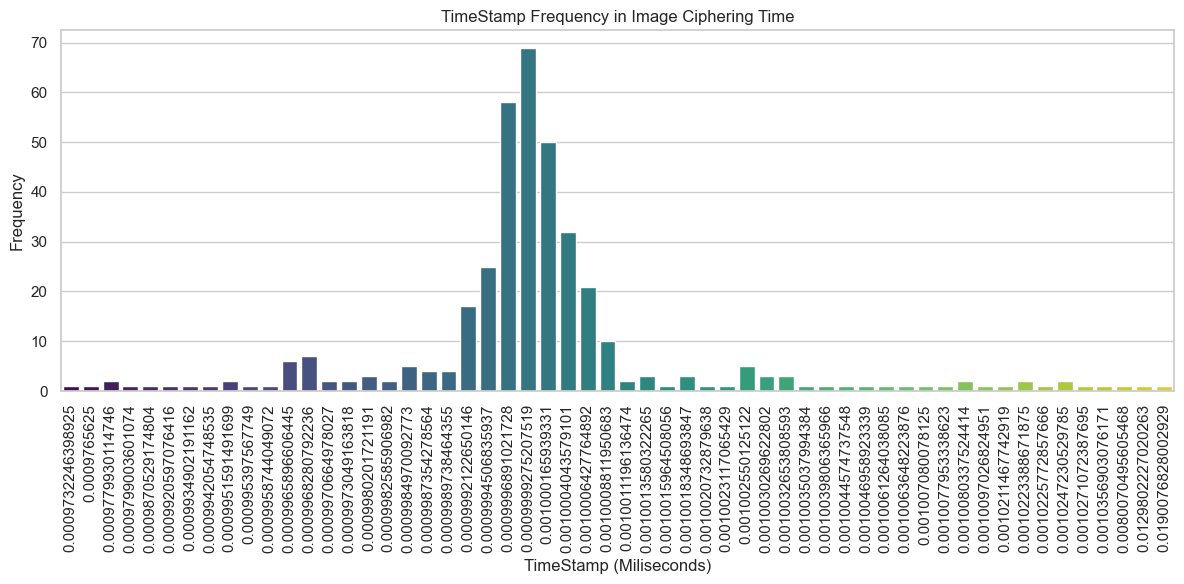

In [102]:
# Filter
TimeStamp_counts_filtered = TimeStamp_count.loc[(TimeStamp_count < TimeStamp_count.max())].sort_index() # TimeStamp_count.max(): 66187
# Bar plot
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=TimeStamp_counts_filtered.index.astype(str), y=TimeStamp_counts_filtered.values, palette="viridis")
plt.xlabel('TimeStamp (Miliseconds)')
plt.ylabel('Frequency')
plt.title('TimeStamp Frequency in Image Ciphering Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Decoded Time**

In [103]:
data_decoded.head()

,TimeStamp,Cipher_Value,Pixel_Value
0,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)"
1,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)"
2,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)"
3,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)"
4,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)"


In [104]:
data_decoded.describe()

,TimeStamp
count,66612.000000
mean,0.000005
std,0.000100
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.018003


In [105]:
# Time to cipher one pixel (X,X,X,X) in miliseconds:
# Time min: 0.000008
# Time max: 0.015016	
# Time mean: 0.000008 

In [106]:
TimeStamp_count_decoded = data_decoded['TimeStamp'].value_counts()
TimeStamp_count_decoded

TimeStamp
0.000000    66275
0.001000       33
0.001000       24
0.001000       17
0.001001       15
            ...  
0.000977        1
0.000991        1
0.001019        1
0.001018        1
0.000981        1
Name: count, Length: 89, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_3120\3638991006.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TimeStamp_counts_filtered.index.astype(str), y=TimeStamp_counts_filtered.values, palette="viridis")


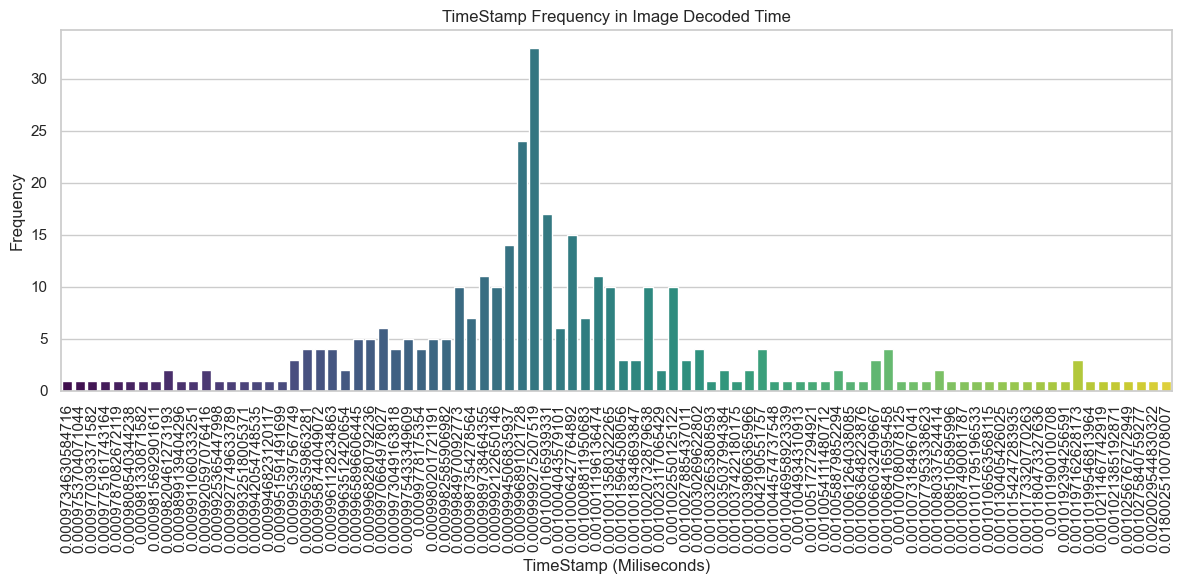

In [107]:
# Filter
TimeStamp_counts_filtered = TimeStamp_count_decoded.loc[(TimeStamp_count_decoded < TimeStamp_count_decoded.max())].sort_index() # TimeStamp_count_decoded.max(): 66187
# Crear el gráfico de barras
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=TimeStamp_counts_filtered.index.astype(str), y=TimeStamp_counts_filtered.values, palette="viridis")
plt.xlabel('TimeStamp (Miliseconds)')
plt.ylabel('Frequency')
plt.title('TimeStamp Frequency in Image Decoded Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Are the images different?**

In [109]:
# Method Haslib to verify if the images are different or not
import hashlib

def sha256_hash(file_path):
    sha256 = hashlib.sha256()
    with open(file_path, 'rb') as file:
        while chunk := file.read(8192):
            sha256.update(chunk)
            
    return sha256.hexdigest()

orginal_image = sha256_hash('./C_and_D_png/box.png')
decoded_image = sha256_hash('./C_and_D_png/resultados/descifrado.png')
print(orginal_image)
print(decoded_image)
if (orginal_image == decoded_image ):
    print("Are the same image")
    
print("The images are differents")

a84cb3be973de9d9e9c96589a2430274fdbf2086010bdad53a0a7d3d8ca94d79
0821ab44c3d1e23049d8aa61e0707fd91c6eb8fc2c0fb5dc96593c54d5af0a6e
The images are differents


# **Are the Pixel Values differents?**

In [110]:
# Convertir la columna Pixel_Value a lista de tuplas si no lo está
data_cipher['Pixel_Value'] = data_cipher['Pixel_Value'].apply(eval)  # Convertir cadena a tupla 

# Pixel_Value de cuatro elementos
assert all(len(pixel) == 4 for pixel in data_cipher['Pixel_Value'])

# Dividir cada tupla en elementos individuales
data_cipher[['R', 'G', 'B', 'A']] = pd.DataFrame(data_cipher['Pixel_Value'].tolist(), columns=['R', 'G', 'B', 'A'])


In [111]:
# Convertir la columna Pixel_Value a lista de tuplas si no lo está
data_decoded['Pixel_Value'] = data_decoded['Pixel_Value'].apply(eval)   # Convertir cadena a tupla 

# Pixel_Value de cuatro elementos
assert all(len(pixel) == 4 for pixel in data_decoded['Pixel_Value']), "Pixel_Value no tiene tuplas de cuatro elementos"

# Dividir cada tupla en elementos individuales
data_decoded[['R', 'G', 'B', 'A']] = pd.DataFrame(data_decoded['Pixel_Value'].tolist(), columns=['R', 'G', 'B', 'A'])

In [112]:
data_cipher.head()

,TimeStamp,Pixel_Value,Ciphered_Value,R,G,B,A
0,0.0,"(255, 255, 255, 255)","(309, 309, 309, 309)",255,255,255,255
1,0.0,"(255, 255, 255, 255)","(309, 309, 309, 309)",255,255,255,255
2,0.0,"(255, 255, 255, 255)","(309, 309, 309, 309)",255,255,255,255
3,0.0,"(255, 255, 255, 255)","(309, 309, 309, 309)",255,255,255,255
4,0.0,"(255, 255, 255, 255)","(309, 309, 309, 309)",255,255,255,255


In [113]:
data_decoded.head()

,TimeStamp,Cipher_Value,Pixel_Value,R,G,B,A
0,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)",255,255,255,255
1,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)",255,255,255,255
2,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)",255,255,255,255
3,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)",255,255,255,255
4,0.0,"(309, 309, 309, 309)","(255, 255, 255, 255)",255,255,255,255


In [114]:
# Filtrar los valores de las matrices
data = data_cipher.loc[(data_cipher['Pixel_Value'] != data_decoded['Pixel_Value'])]
data.count()

TimeStamp         0
Pixel_Value       0
Ciphered_Value    0
R                 0
G                 0
B                 0
A                 0
dtype: int64

In [115]:
data = data_cipher.loc[
    (data_cipher['R'] != data_decoded['R']) | 
    (data_cipher['G'] != data_decoded['G']) | 
    (data_cipher['B'] != data_decoded['B']) | 
    (data_cipher['A'] != data_decoded['A'])
]
data.count()

TimeStamp         0
Pixel_Value       0
Ciphered_Value    0
R                 0
G                 0
B                 0
A                 0
dtype: int64

In [87]:
# The pixel values are the same, so what is happening here? ---->

In [116]:
# Method Haslib to verify if the images are different or not
import hashlib
def sha256_hash(file_path):
    sha256 = hashlib.sha256()
    with open(file_path, 'rb') as file:
        while chunk := file.read(8192):
            sha256.update(chunk)
            
    return sha256.hexdigest()

orginal_image = sha256_hash('./C_and_D_png/box.png')
decoded_image = sha256_hash('./C_and_D_png/resultados/descifrado.png')
print(orginal_image)
print(decoded_image)
if (orginal_image == decoded_image ):
    print("Are the same image")
    
print("The images are differents")

a84cb3be973de9d9e9c96589a2430274fdbf2086010bdad53a0a7d3d8ca94d79
0821ab44c3d1e23049d8aa61e0707fd91c6eb8fc2c0fb5dc96593c54d5af0a6e
The images are differents
